<a href="https://colab.research.google.com/github/Jackil1993/GPT3_SCM/blob/main/GPT_economics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
models = ['GPT-1 \n 2018 ', 'GPT-2 \n 2019 ', 'GPT-3 \n 2020']
param = [117, 1542, 175000]
layers = [12, 48, 96]
dmodel = [768, 1600, 12288]
context_size = [512, 1024, 2048] 
data = [1.1, 40, 570] #GB
df = pd.DataFrame()
col_names = ['Models', 'Parameters', 'Layers', 'd_model', 'Context window (tokens)', 'Data (GB)']
cols = [models, param, layers, dmodel, context_size, data]
for i in range(len(cols)):
  df[col_names[i]] = cols[i]

In [ ]:
df

,Models,Parameters,Layers,d_model,Context window (tokens),Data (GB)
0,GPT-1 \n 2018,117,12,768,512,1.1
1,GPT-2 \n 2019,1542,48,1600,1024,40.0
2,GPT-3 \n 2020,175000,96,12288,2048,570.0


In [ ]:
df['log(parameters)'] = np.log(df['Parameters'])
df['log(dataset size)'] = np.log(df['Data (GB)'])

In [ ]:
df['Param'] = df['Parameters']
df['Number of parameters'] = ['117 M', '1,542 M', '175,000 M']

In [ ]:
df

,Models,Parameters,Layers,d_model,Context window (tokens),Data (GB),log(parameters),log(dataset size),Param,Number of parameters
0,GPT-1 \n 2018,117,12,768,512,1.1,4.762174,0.095310,117,117 M
1,GPT-2 \n 2019,1542,48,1600,1024,40.0,7.340836,3.688879,1542,"1,542 M"
2,GPT-3 \n 2020,175000,96,12288,2048,570.0,12.072541,6.345636,175000,"175,000 M"


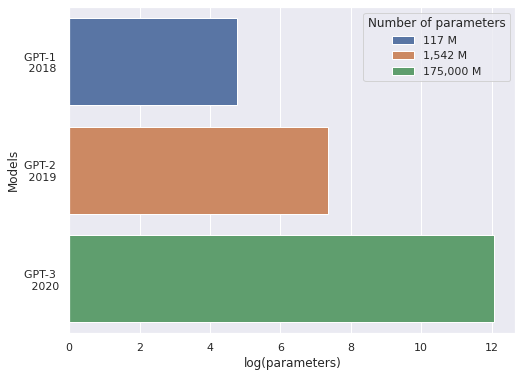

In [ ]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(y="Models", x="log(parameters)", data=df, palette=None, hue='Number of parameters', dodge=False)
fig.savefig("param.png", dpi=600)

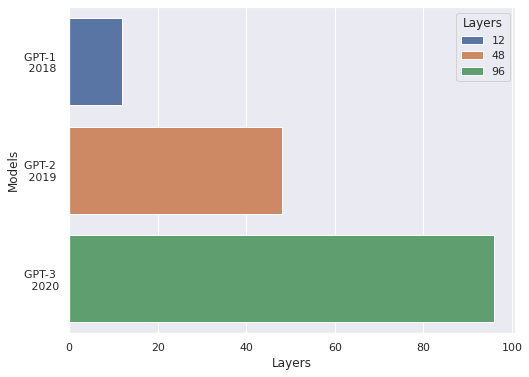

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1 = sns.barplot(y="Models", x="Layers", data=df, palette=None, hue='Layers', dodge=False)
fig1.savefig("layers.png", dpi=600)

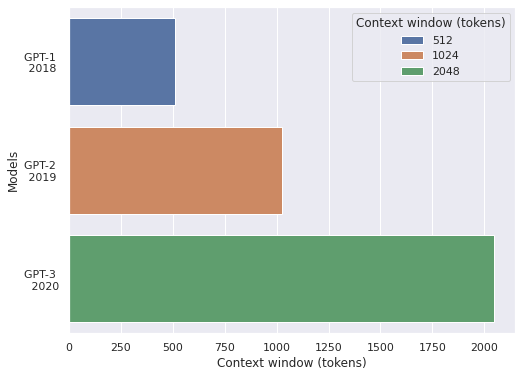

In [ ]:
fig2, ax2 = plt.subplots(figsize=(8,6))
ax2 = sns.barplot(y="Models", x="Context window (tokens)", data=df, palette=None, hue='Context window (tokens)', dodge=False)
fig2.savefig("tokens.png", dpi=600)

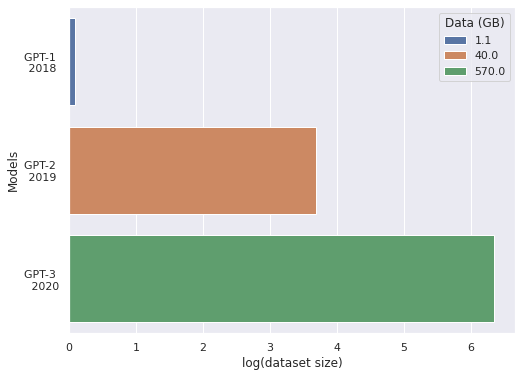

In [ ]:
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3 = sns.barplot(y="Models", x="log(dataset size)", data=df, palette=None, hue='Data (GB)', dodge=False)
fig3.savefig("data.png", dpi=600)

In [12]:
#https://commoncrawl.org/connect/blog/
mo = ['January', 'February/March', 'April', 'May', 'June', 'July/August', 'September'] #2021
x = [3.4, 2.7, 3.1, 2.6, 2.45, 3.15, 2.95] # billion web pages
y = [350, 280,  320, 280, 260, 360, 310] #TiB of uncompressed content
z = [1.15, 1.2, 1.35, 1.28, 1.3, 1.0, 1.3] #billion new URLs, not visited in any of our prior crawls
y = [i*1.09951 for i in y] #TB of uncompressed content
xlabel = 'billion web pages'
ylabel = 'TB of uncompressed content'

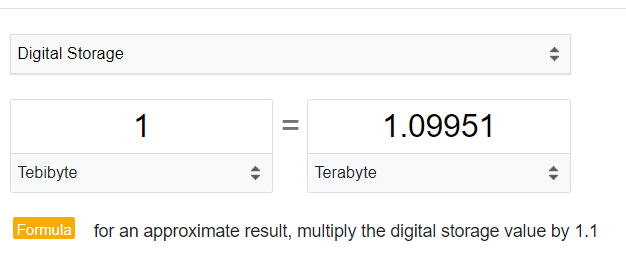

In [13]:
cc = pd.DataFrame()
cc['Month'] = mo
cc['billion web pages'] = x
cc['TB of uncompressed content'] = y
cc['billion new URLs, not visited in any of our prior crawls'] = z
cc

,Month,billion web pages,TB of uncompressed content,"billion new URLs, not visited in any of our prior crawls"
0,January,3.40,384.8285,1.15
1,February/March,2.70,307.8628,1.20
2,April,3.10,351.8432,1.35
3,May,2.60,307.8628,1.28
4,June,2.45,285.8726,1.30
5,July/August,3.15,395.8236,1.00
6,September,2.95,340.8481,1.30


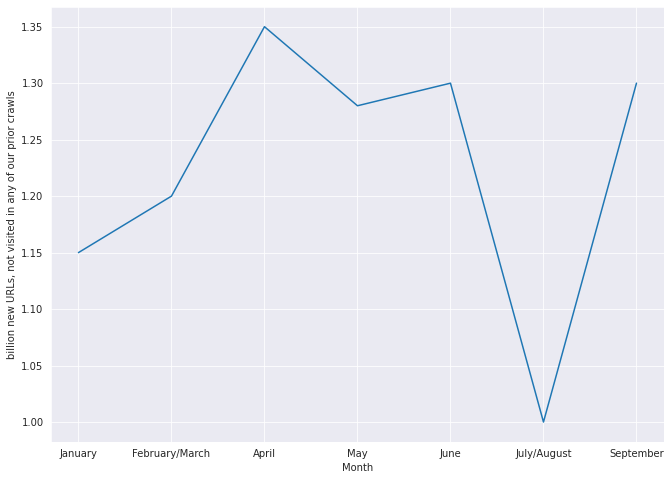

In [14]:
fig = plt.gcf()
fig.set_size_inches(11, 8)
sns.set_style("darkgrid")
sns.lineplot(data=cc, x="Month", y="billion new URLs, not visited in any of our prior crawls")
plt.show()

Coefficients: 
 [[115.3228264]]
Mean squared error: 160.00
Coefficient of determination: 0.89
Root mean squared error: 12.65


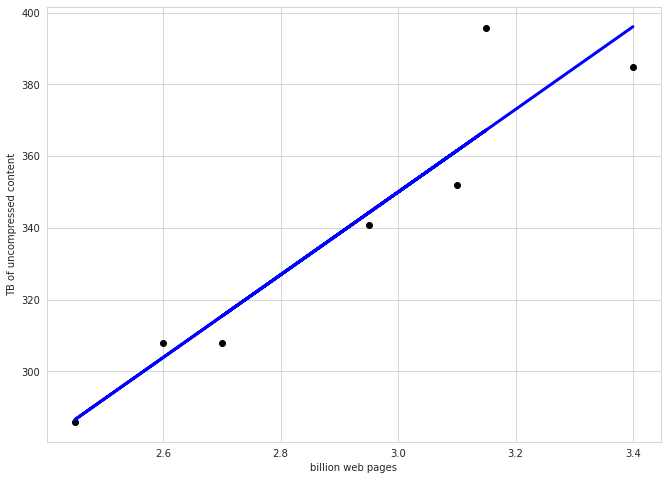

In [16]:
regr = linear_model.LinearRegression()
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
regr.fit(x, y)
y_pred = regr.predict(x)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))
print("Root mean squared error: %.2f" % mean_squared_error(y, y_pred, squared=False))

# Plot outputs
fig1 = plt.gcf()
sns.set_style("whitegrid")
fig1.set_size_inches(11, 8)
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)
plt.xlabel('billion web pages')
plt.ylabel('TB of uncompressed content')
plt.grid(True)
plt.show()

In [17]:
x = [3.4, 2.7, 3.1, 2.6, 2.45, 3.15, 2.95] # billion web pages
y = [350, 280,  320, 280, 260, 360, 310] #TiB of uncompressed content
df = pd.DataFrame()
df['Billion web pages'] = x
df['TB of uncompressed content'] = y

In [ ]:
df

,Billion web pages,TiB of uncompressed content
0,3.40,350
1,2.70,280
2,3.10,320
3,2.60,280
4,2.45,260
5,3.15,360
6,2.95,310


In [ ]:
mod = sm.OLS(df['TiB of uncompressed content'], df['Billion web pages'])
res = mod.fit()
print(res.summary()) 

                                     OLS Regression Results                                     
Dep. Variable:     TiB of uncompressed content   R-squared (uncentered):                   0.999
Model:                                     OLS   Adj. R-squared (uncentered):              0.998
Method:                          Least Squares   F-statistic:                              4360.
Date:                         Mon, 15 Nov 2021   Prob (F-statistic):                    8.11e-10
Time:                                 20:57:14   Log-Likelihood:                         -27.036
No. Observations:                            7   AIC:                                      56.07
Df Residuals:                                6   BIC:                                      56.02
Df Model:                                    1                                                  
Covariance Type:                     nonrobust                                                  
                        coef  

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


p-value is less than the significance level, which implies that the sample data provide sufficient evidence to conclude that the regression model fits the data better than the model with no independent variables.

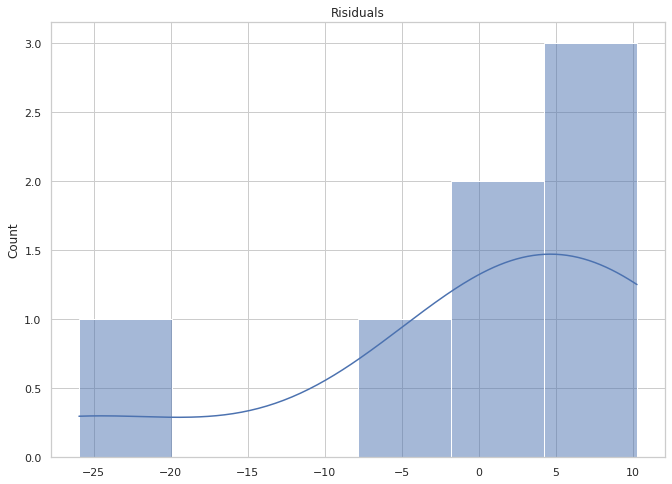

In [ ]:
difference = y_pred - y
fig1 = plt.gcf()
fig1.set_size_inches(11, 8)
plt.title('Risiduals')
sns.histplot(difference, bins=6, kde=True, legend=False)
plt.show()

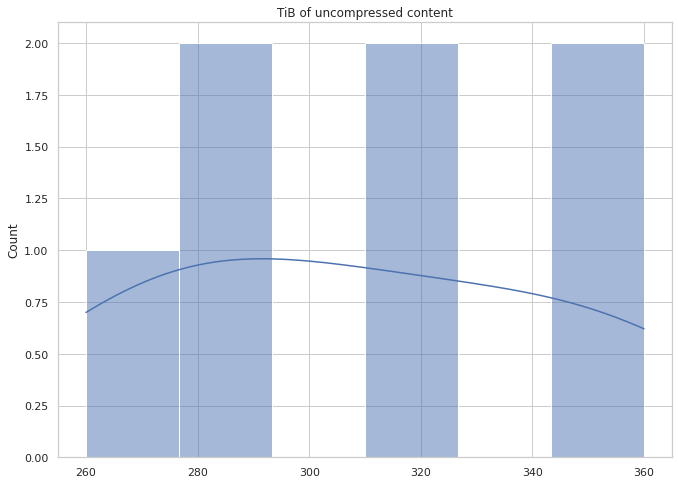

In [ ]:
fig1 = plt.gcf()
fig1.set_size_inches(11, 8)
plt.title('TiB of uncompressed content')
sns.histplot(y, bins=6, kde=True, legend=False)
plt.show()